In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


pd.set_option('display.max_rows', 1000)  # or 1000
pd.set_option('display.max_columns', 1000)  # or 1000

In [2]:
from sklearn.linear_model import LinearRegression

In [10]:
df = pd.read_csv('../project_2/datasets/sample_sub_reg.csv')
# df = pd.read_csv('datasets/train.csv')

OSError: [Errno 22] Invalid argument

In [ ]:
df.head(10)

In [ ]:
df.columns

In [ ]:
# rename column names 

new_columns = {
    'Id': 'id',
    'PID':'pid',
    'MS SubClass': 'ms_subclass',
    'MS Zoning': 'ms_zoning',
    'Lot Frontage': 'lot_front',
    'Lot Area': 'lot_area',
    'Street': 'street',
    'Alley':'alley',
    'Lot Shape': 'lot_shape',
    'Land Contour':'land_contour',
    'Utilities': 'util',
    'Lot Config': 'lot_config',
    'Land Slope': 'land_slope',
    'Neighborhood': 'neighborhood',
    'Condition 1': 'cond_1',    
    'Condition 2': 'cond_2',
    'Bldg Type': 'bldg_type',
    'House Style': 'house_style',
    'Overall Qual': 'overall_qual',
    'Overall Cond': 'overall_cond',
    'Year Built': 'year_built',
    'Year Remod/Add': 'year_remod_add',
    'Roof Style': 'roof_style',
    'Roof Matl': 'roof_matl',
    'Exterior 1st': 'ext_1st',
    'Exterior 2nd': 'ext_2nd',
    'Mas Vnr Type': 'mas_vnr_type',
    'Mas Vnr Area': 'mas_vnr_area',
    'Exter Qual': 'exter_qual',
    'Exter Cond': 'exter_cond',
    'Foundation': 'foundation',
    'Bsmt Qual': 'bsmt_qual',
    'Bsmt Cond': 'bsmt_cond',
    'Bsmt Exposure': 'bsmt_exposure',
    'BsmtFin Type 1': 'bsmtfin_type1',
    'BsmtFin SF 1': 'bsmtfin_sf1',
    'BsmtFin Type 2': 'bsmt_type2',
    'BsmtFin SF 2': 'bsmt_sf2',
    'Bsmt Unf SF': 'bsmt_unf_sf',
    'Total Bsmt SF': 'total_bsmt_sf',
    'Heating': 'heating',
    'Heating QC': 'heating_qc',
    'Central Air': 'central_air',
    'Electrical': 'electrical',
    '1st Flr SF': '1st_flr_sf',
    '2nd Flr SF': '2nd_flr_sf',
    'Low Qual Fin SF': 'low_qual_fin_sf',
    'Gr Liv Area': 'gr_liv_area',
    'Bsmt Full Bath': 'bsmt_full_bath',    
    'Bsmt Half Bath': 'bsmt_half_bath',
    'Full Bath': 'full_bath',
    'Half Bath': 'half_bath',
    'Bedroom AbvGr': 'bedroom_abv_gr',
    'Kitchen AbvGr': 'kitchen_abv_gr',
    'Kitchen Qual': 'kitchen_qual',
    'TotRms AbvGrd': 'tot_rms_abv_grd',
    'Functional': 'functional',
    'Fireplaces': 'fireplace',
    'Fireplace Qu': 'fireplace_qu',
    'Garage Type': 'garage_type',
    'Garage Yr Blt': 'garage_yr_blt',
    'Garage Finish': 'garage_finish',
    'Garage Cars': 'garag_cars',
    'Garage Area': 'garage_area',
    'Garage Qual': 'garage_qual',
    'Garage Cond': 'garage_cond',
    'Paved Drive': 'paved_drive',
    'Wood Deck SF': 'wood_deck_sf',
    'Open Porch SF': 'open_porch_sf',
    'Enclosed Porch': 'enclosed_porch',
    '3Ssn Porch': '3ssn_porch',
    'Screen Porch': 'screen_porch',
    'Pool Area': 'pool_area',
    'Pool QC': 'pool_qc',
    'Fence': 'fence',
    'Misc Feature': 'misc_feature',
    'Misc Val': 'misc_val',
    'Mo Sold': 'mo_sold',
    'Yr Sold': 'yr_sold',
    'Sale Type': 'sale_type',
    'SalePrice':'sale_price',
}

df.rename(columns=new_columns, inplace=True)

In [ ]:
df.head()

## EDA
- **Read the data dictionary.**
- Determine _what_ missing values mean.
- Figure out what each categorical value represents.
- Identify outliers.
- Consider whether discrete values are better represented as categorical or continuous. (Are relationships to the target linear?)

## Data Cleaning
- Decide how to impute null values.
- Decide how to handle outliers.
- Do you want to combine any features?
- Do you want to have interaction terms?
- Do you want to manually drop collinear features?

**Clean missing values**  

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df['lot_front'].describe()

In [ ]:
sns.histplot(x = 'lot_front', data =df)

In [ ]:
# get mean and fill into NA
# why mean -->> because normally distributed centered at mean 69. 
df['lot_front'].fillna(df['lot_front'].mean(),inplace = True)

In [ ]:
# drop in NoAlleyAccess
df['alley'] = df['alley'].map(lambda x: 'NoAlleyAccess' if pd.isnull(x) else x)

In [ ]:
# no meaning to the sales 
# drop alley

sns.boxplot(
    data = df,
    x = 'alley',
    y = 'sale_price'
)

df.drop('alley', axis = 1, inplace = True)

In [ ]:
# mas_vnr_type -->> categorical, insert most common type 
df.groupby(by='mas_vnr_type').count()

In [ ]:
# fill missing values with mode of mas_vnr_type
df['mas_vnr_type'].fillna(df['mas_vnr_type'].mode()[0], inplace = True)

In [ ]:
# checked categories for mas_vnr_area
# found if mas vnr area == 0, then belongs to none
sns.histplot(x = 'mas_vnr_area', hue = 'mas_vnr_type', data =df)
plt.xlim(0,600)

In [ ]:
# create dictionary that stores mean of
mas_dict_mean = {key:val for key, val in df.groupby(['mas_vnr_type'])['mas_vnr_area'].mean().iteritems()}

mas_dict_mean

In [4]:
# create function that returns mean based on mas_dict_mean if column has null values 
def enter_area(col):
    area = col[0]
    mas_type = col[1]
    if pd.isnull(area):
        return mas_dict_mean[mas_type]
    else:
        return area

In [5]:
# fill in null values for -->> mas_vnr_area
df['mas_vnr_area'] = df[['mas_vnr_area', 'mas_vnr_type']].apply(enter_area, axis = 1)

NameError: name 'df' is not defined

In [6]:
# missing values seems common across about bsmt columns 
df[df['bsmt_exposure'].isnull()]

NameError: name 'df' is not defined

In [7]:
# create pairplot to check relationship between all bsmt parameters against sale_price
# noticed only total_basement_sf area has high correlation with sale_price
# checked only 58 out of 2051 data has NAN -->> meaning no basement 
# checked no significant cluster along finished square feets of 0. 
# shows no correlation to sales price at zero 
# hence decide to drop all NO BASEMENT rows

df_sub_bsmt = df[['sale_price','bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf']]

sns.pairplot(df_sub_bsmt)

NameError: name 'df' is not defined

In [8]:
sns.lmplot(
    x = 'bsmtfin_sf1',
    y = 'sale_price',
    data = df
)


NameError: name 'df' is not defined

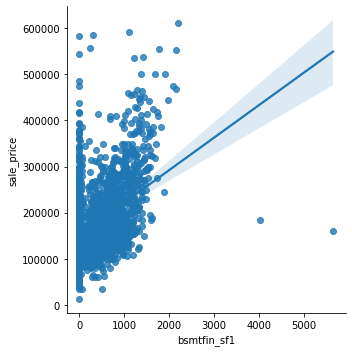

In [306]:
# not much changes to distribution 
temp_df = df[df['bsmt_exposure'].isnull() == False]

sns.lmplot(
    x = 'bsmtfin_sf1',
    y = 'sale_price',
    data = temp_df
)

In [307]:
# expected number of rows after removing 

len(df) - len(df[df['bsmt_exposure'].isnull()])

1993

In [308]:
# remove rows without basement 
df.dropna(subset=['bsmt_exposure'], inplace = True)

In [309]:
# since bsmt_sf2 is 479 -->>  
df[df['bsmt_type2'].isnull()]

id        pid  ms_subclass ms_zoning  lot_front  lot_area street  \
1147  445  528142130           20        RL       85.0     10655   Pave   

     lot_shape land_contour    util lot_config land_slope neighborhood cond_1  \
1147       IR1          Lvl  AllPub     Inside        Gtl      NridgHt   Norm   

     cond_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
1147   Norm      1Fam      1Story             8             5        2003   

      year_remod_add roof_style roof_matl  ext_1st  ext_2nd mas_vnr_type  \
1147            2004      Gable   CompShg  VinylSd  VinylSd      BrkFace   

      mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond  \
1147         296.0         Gd         TA      PConc        Gd        TA   

     bsmt_exposure bsmtfin_type1  bsmtfin_sf1 bsmt_type2  bsmt_sf2  \
1147            No           GLQ       1124.0        NaN     479.0   

      bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  \
1147       1603.0         3206.0    GasA         Ex           Y      SBrkr   

      1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
1147        1629           0                0         1629             1.0   

      bsmt_half_bath  full_bath  half_bath  bedroom_abv_gr  kitchen_abv_gr  \
1147             0.0          2          0               3               1   

     kitchen_qual  tot_rms_abv_grd functional  fireplace fireplace_qu  \
1147           Gd                7        Typ          1           Gd   

     garage_type  garage_yr_blt garage_finish  garag_cars  garage_area  \
1147      Attchd         2003.0           RFn         3.0        880.0   

     garage_qual garage_cond paved_drive  wood_deck_sf  open_porch_sf  \
1147          TA          TA           Y             0              0   

      enclosed_porch  3ssn_porch  screen_porch  pool_area pool_qc fence  \
1147               0           0             0          0     NaN   NaN   

     misc_feature  misc_val  mo_sold  yr_sold sale_type  sale_price  
1147          NaN         0       10     2009       WD       284000

mean  median
bsmt_type2                    
ALQ         530.685714   539.0
BLQ         318.875000   245.5
GLQ         705.043478   619.0
LwQ         325.583333   268.0
Rec         352.500000   275.5
Unf           0.003436     0.0

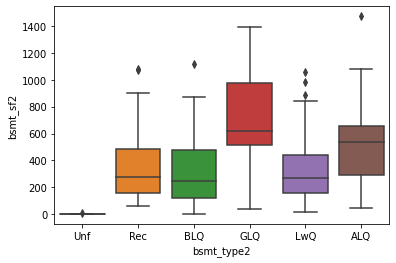

In [310]:
# showing box plot for bsmt_type2 to categorise NAN data. 
sns.boxplot(
    data = df,
    y = 'bsmt_sf2',
    x = 'bsmt_type2'
)

df.groupby('bsmt_type2').agg(['mean','median'])['bsmt_sf2']

In [311]:
# replace NAN with the most common unfinished 
df['bsmt_type2'].fillna('ALQ', inplace = True)

In [312]:
df.groupby(['fireplace_qu'])['sale_price'].mean().values

array([342842.27586207, 170287.20338983, 234346.74081238, 140322.76666667,
       205395.0471464 ])

<AxesSubplot:xlabel='fireplace_qu', ylabel='sale_price'>

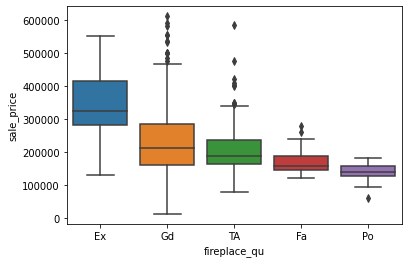

In [313]:
sns.boxplot(
    x = 'fireplace_qu',
    y = 'sale_price',
    data = df,
    order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
)

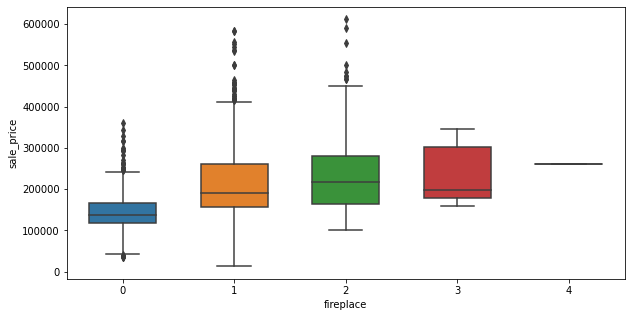

In [314]:
# Establish size of figure.
plt.figure(figsize = (10,5))


sns.boxplot(
    x = 'fireplace',
    y = 'sale_price',
    data = df,
#     hue = 'fireplace_qu',
#     hue_order = ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    width = 0.6
);


In [315]:
# null values contain sale price mean close to 144000
df[df['fireplace_qu'].isnull()].agg(['mean', 'median'])['sale_price']

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


mean      144072.201047
median    137500.000000
Name: sale_price, dtype: float64

In [316]:
# found that cat Po suites best for null values to be included without affecting much mean 
df.groupby(['fireplace_qu']).agg(['mean', 'median', 'count'])['sale_price']

mean    median  count
fireplace_qu                                
Ex            342842.275862  325000.0     29
Fa            170287.203390  159500.0     59
Gd            234346.740812  214000.0    517
Po            140322.766667  140000.0     30
TA            205395.047146  188900.0    403

In [317]:
df.groupby(['fireplace_qu']).count()['fireplace']

fireplace_qu
Ex     29
Fa     59
Gd    517
Po     30
TA    403
Name: fireplace, dtype: int64

In [318]:
df[df['fireplace_qu'].isnull()].head(30)

id        pid  ms_subclass ms_zoning  lot_front  lot_area street  \
0    109  533352170           60        RL    69.0552     13517   Pave   
2    153  535304180           20        RL    68.0000      7922   Pave   
3    318  916386060           60        RL    73.0000      9802   Pave   
4    255  906425045           50        RL    82.0000     14235   Pave   
6   2827  908186070          180        RM    35.0000      3675   Pave   
7    145  535154050           20        RL    69.0552     12160   Pave   
8   1942  535353130           20        RL    69.0552     15783   Pave   
10  1044  527451290          160        RM    21.0000      1680   Pave   
11  2752  906380150           20        RL    64.0000      7488   Pave   
13  1177  533236070          160        FV    24.0000      2645   Pave   
14  1480  907418040           20        RL    74.0000      9627   Pave   
15   324  923202105           20        RL    93.0000     10114   Pave   
16  1311  902301140           70        RM    34.0000      4571   Pave   
17   770  905101490           20        RL    80.0000      8816   Pave   
19    69  528458070           60        FV    72.0000      8640   Pave   
23    12  527165230           20        RL    69.0552      7980   Pave   
24  2339  527250040          190        RL   100.0000     34650   Pave   
28  2243  911103060          190   C (all)    75.0000      8250   Pave   
33  1933  535302070           20        RL    60.0000     10950   Pave   
39  2125  907135050           20        RL    60.0000      8428   Pave   
40  1489  908102260           20        RL    75.0000      9937   Pave   
43  1325  902406090           50        RM    81.0000     12150   Pave   
44  1378  905102170           20        RL    70.0000     11200   Pave   
46   905  909101140           50        RL    60.0000     10998   Pave   
48   132  534475100           20        RL    80.0000      9920   Pave   
49  1078  528188090          160        RL    36.0000      2448   Pave   
50  2511  533221080          160        FV    69.0552      2998   Pave   
53   330  923226250          160        RM    21.0000      1476   Pave   
55   224  905106140           60        RL    80.0000      9364   Pave   
56    98  533212020          160        FV    24.0000      2544   Pave   

   lot_shape land_contour    util lot_config land_slope neighborhood  cond_1  \
0        IR1          Lvl  AllPub    CulDSac        Gtl       Sawyer    RRAe   
2        Reg          Lvl  AllPub     Inside        Gtl        NAmes    Norm   
3        Reg          Lvl  AllPub     Inside        Gtl       Timber    Norm   
4        IR1          Lvl  AllPub     Inside        Gtl      SawyerW    Norm   
6        Reg          Lvl  AllPub     Inside        Gtl      Edwards    Norm   
7        IR1          Lvl  AllPub     Inside        Gtl        NAmes    Norm   
8        Reg          Lvl  AllPub     Inside        Gtl      OldTown  Artery   
10       Reg          Lvl  AllPub     Inside        Gtl       BrDale    Norm   
11       IR1          Lvl  AllPub     Inside        Gtl      CollgCr    Norm   
13       Reg          Lvl  AllPub     Inside        Gtl      Somerst    Norm   
14       Reg          Lvl  AllPub     Inside        Gtl      CollgCr    Norm   
15       Reg          Lvl  AllPub     Inside        Gtl      Mitchel    Norm   
16       Reg          Lvl  AllPub     Inside        Gtl      OldTown    Norm   
17       Reg          Lvl  AllPub     Corner        Gtl       Sawyer   Feedr   
19       Reg          Lvl  AllPub     Inside        Gtl      Somerst    Norm   
23       IR1          Lvl  AllPub     Inside        Gtl      Gilbert    Norm   
24       Reg          Bnk  AllPub     Inside        Gtl      Gilbert    Norm   
28       Reg          Lvl  AllPub     Inside        Gtl       IDOTRR   Feedr   
33       Reg          Lvl  AllPub     Inside        Gtl        NAmes    Norm   
39       IR2          Lvl  AllPub     Inside        Gtl      CollgCr    Norm   
40       Reg          Lvl  AllP

In [319]:
# df['fireplace_qu'] = df['fireplace_qu'].replace(0, 'Po')

In [320]:
df['fireplace_qu'].isnull().sum()

955

In [321]:
df['fireplace_qu'] = df['fireplace_qu'].fillna('Gd')

In [330]:
X = pd.get_dummies(data = df, columns = ['fireplace_qu'], drop_first = True)
filter_col = [col for col in X if col.startswith('fireplace_qu')]

X[filter_col]

fireplace_qu_Fa  fireplace_qu_Gd  fireplace_qu_Po  fireplace_qu_TA
0                   0                1                0                0
1                   0                0                0                1
2                   0                1                0                0
3                   0                1                0                0
4                   0                1                0                0
...               ...              ...              ...              ...
2046                0                1                0                0
2047                0                1                0                0
2048                0                0                0                1
2049                0                1                0                0
2050                0                0                0                1

[1993 rows x 4 columns]

In [331]:
# calculate these metrics by hand!
from sklearn import metrics

X = X[filter_col]
y = df['sale_price']

# Step 2: Instantiate the model
lr = LinearRegression()

lr.fit(X,y)


# Make predictions
y_pred = lr.predict(X)


new = lr.score(X,y)
new_mse = metrics.mean_squared_error(y, y_pred)
new

0.08701767120691872

In [332]:
score = 0.2172421059684908
mse = 4890330153.123258

score_po = 0.30651724286487425
mse_Po = 4332578008.791621

score_Gd = 0.08701767120691872
mse_Gd = 5703915662.568548


print(new-score_Gd)
print(new_mse-mse_Gd)

0.0
0.0


In [37]:
df['fireplace_qu'].fillna(0, inplace = True)

In [38]:
df['fireplace_qu'].mode()

0    0
dtype: object

In [39]:
df.groupby(['fireplace_qu']).count()

id  pid  ms_subclass  ms_zoning  lot_front  lot_area  street  \
fireplace_qu                                                                  
0             955  955          955        955        955       955     955   
Ex             29   29           29         29         29        29      29   
Fa             59   59           59         59         59        59      59   
Gd            517  517          517        517        517       517     517   
Po             30   30           30         30         30        30      30   
TA            403  403          403        403        403       403     403   

              lot_shape  land_contour  util  lot_config  land_slope  \
fireplace_qu                                                          
0                   955           955   955         955         955   
Ex                   29            29    29          29          29   
Fa                   59            59    59          59          59   
Gd                  517           517   517         517         517   
Po                   30            30    30          30          30   
TA                  403           403   403         403         403   

              neighborhood  cond_1  cond_2  bldg_type  house_style  \
fireplace_qu                                                         
0                      955     955     955        955          955   
Ex                      29      29      29         29           29   
Fa                      59      59      59         59           59   
Gd                     517     517     517        517          517   
Po                      30      30      30         30           30   
TA                     403     403     403        403          403   

              overall_qual  overall_cond  year_built  year_remod_add  \
fireplace_qu                                                           
0                      955           955         955             955   
Ex                      29            29          29              29   
Fa                      59            59          59              59   
Gd                     517           517         517             517   
Po                      30            30          30              30   
TA                     403           403         403             403   

              roof_style  roof_matl  ext_1st  ext_2nd  mas_vnr_type  \
fireplace_qu                                                          
0                    955        955      955      955           955   
Ex                    29         29       29       29            29   
Fa                    59         59       59       59            59   
Gd                   517        517      517      517           517   
Po                    30         30       30       30            30   
TA                   403        403      403      403           403   

              mas_vnr_area  exter_qual  exter_cond  foundation  bsmt_qual  \
fireplace_qu                                                                
0                      955         955         955         955        955   
Ex                      29          29          29          29         29   
Fa                      59          59          59          59         59   
Gd                     517         517         517         517        517   
Po                      30          30          30          30         30   
TA                     403         403         403         403        403   

              bsmt_cond  bsmt_exposure  bsmtfin_type1  bsmtfin_sf1  \
fireplace_qu                                                         
0                   955            955            955          955   
Ex                   29             29             29           29   
Fa                   59             59             59           59   
Gd                  517            517            517          517   
Po                   30             30             30           30   

### EDA ANALYSIS

In [40]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_front', 'lot_area',
       'street', 'lot_shape', 'land_contour', 'util', 'lot_config',
       'land_slope', 'neighborhood', 'cond_1', 'cond_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod_add', 'roof_style', 'roof_matl', 'ext_1st', 'ext_2nd',
       'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abv_gr', 'kitchen_abv_gr', 'kitchen_qual', 'tot_rms_abv_grd',
       'functional', 'fireplace', 'fireplace_qu', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garag_cars', 'garage_area',
       

**useless parameters**

- id, pid, lot_front, lot_area

**What is the most correlated to housing sale price**

- 

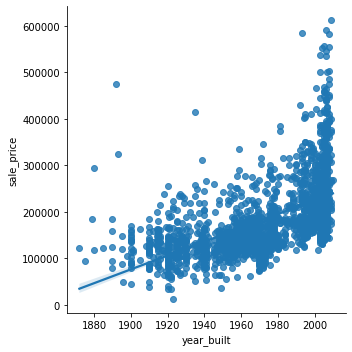

In [41]:
sns.lmplot(x = 'year_built', y = 'sale_price', data = df)

In [42]:
df.fence = df['fence'].map(lambda x: 'NoFence' if pd.isnull(x) else x)

In [43]:
# garage year built max - has data of year 2021

df.loc[df['garage_yr_blt'] > 2022]

id        pid  ms_subclass ms_zoning  lot_front  lot_area street  \
1699  2261  916384070           20        RL       68.0      8298   Pave   

     lot_shape land_contour    util lot_config land_slope neighborhood cond_1  \
1699       IR1          HLS  AllPub     Inside        Gtl       Timber   Norm   

     cond_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
1699   Norm      1Fam      1Story             8             5        2006   

      year_remod_add roof_style roof_matl  ext_1st  ext_2nd mas_vnr_type  \
1699            2007        Hip   CompShg  VinylSd  VinylSd         None   

      mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond  \
1699      0.521346         Gd         TA      PConc        Gd        TA   

     bsmt_exposure bsmtfin_type1  bsmtfin_sf1 bsmt_type2  bsmt_sf2  \
1699            Av           GLQ        583.0        Unf       0.0   

      bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  \
1699        963.0         1546.0    GasA         Ex           Y      SBrkr   

      1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
1699        1564           0                0         1564             0.0   

      bsmt_half_bath  full_bath  half_bath  bedroom_abv_gr  kitchen_abv_gr  \
1699             0.0          2          0               2               1   

     kitchen_qual  tot_rms_abv_grd functional  fireplace fireplace_qu  \
1699           Ex                6        Typ          1           Gd   

     garage_type  garage_yr_blt garage_finish  garag_cars  garage_area  \
1699      Attchd         2207.0           RFn         2.0        502.0   

     garage_qual garage_cond paved_drive  wood_deck_sf  open_porch_sf  \
1699          TA          TA           Y           132              0   

      enclosed_porch  3ssn_porch  screen_porch  pool_area pool_qc    fence  \
1699               0           0             0          0     NaN  NoFence   

     misc_feature  misc_val  mo_sold  yr_sold sale_type  sale_price  
1699          NaN         0        9     2007       New      267300

In [44]:
df.drop(index = 1699, axis = 0, inplace = True)

In [45]:
df.sort_values('screen_porch', ascending = False)

id        pid  ms_subclass ms_zoning  lot_front  lot_area street  \
1357   388  527375100           20        RL    69.0552      9373   Pave   
974   1289  902105020           50        RM    60.0000     10440   Pave   
52    2351  527356020           60        RL    80.0000     16692   Pave   
1035  2667  902400110           75        RM    90.0000     22950   Pave   
1947   833  906402060           80        RL    69.0552     12800   Pave   
...    ...        ...          ...       ...        ...       ...    ...   
704   1298  902134100           30        RM    60.0000      6756   Pave   
702    891  908152100           80        RL    72.0000      7200   Pave   
701   2269  916455110           80        RL    73.0000      9590   Pave   
698    751  903429080           70        RM    50.0000      2500   Pave   
2050    10  527162130           60        RL    60.0000      7500   Pave   

     lot_shape land_contour    util lot_config land_slope neighborhood  \
1357       IR1          Lvl  AllPub    CulDSac        Gtl       NWAmes   
974        Reg          Lvl  AllPub     Corner        Gtl      OldTown   
52         IR1          Lvl  AllPub     Inside        Gtl       NWAmes   
1035       IR2          Lvl  AllPub     Inside        Gtl      OldTown   
1947       Reg          Low  AllPub     Inside        Mod      SawyerW   
...        ...          ...     ...        ...        ...          ...   
704        Reg          Lvl  AllPub     Inside        Gtl      OldTown   
702        Reg          Lvl  AllPub     Inside        Gtl      Edwards   
701        IR1          Lvl  AllPub     Corner        Gtl       Timber   
698        Reg          Lvl  AllPub     Corner        Gtl      OldTown   
2050       Reg          Lvl  AllPub     Inside        Gtl      Gilbert   

      cond_1 cond_2 bldg_type house_style  overall_qual  overall_cond  \
1357    PosN   Norm      1Fam      1Story             5             7   
974     Norm   Norm      1Fam      1.5Fin             6             7   
52      RRAn   Norm      1Fam      2Story             7             5   
1035  Artery   Norm      1Fam      2.5Fin            10             9   
1947    Norm   Norm      1Fam        SLvl             7             5   
...      ...    ...       ...         ...           ...           ...   
704     Norm   Norm      1Fam      1Story             5             6   
702     Norm   Norm      1Fam        SLvl             6             6   
701     Norm   Norm      1Fam        SLvl             7             5   
698     Norm   Norm      1Fam      2Story             7             8   
2050    Norm   Norm      1Fam      2Story             7             5   

      year_built  year_remod_add roof_style roof_matl  ext_1st  ext_2nd  \
1357        1975            1975      Gable   CompShg  HdBoard  HdBoard   
974         1920            1950      Gable   CompShg  BrkFace  Wd Sdng   
52          1978            1978      Gable   CompShg  Plywood  Plywood   
1035        1892            1993      Gable   WdShngl  Wd Sdng  Wd Sdng   
1947        1989            1989      Gable   CompShg  Wd Sdng  Wd Sdng   
...          ...             ...        ...       ...      ...      ...   
704         1910            1950    Mansard   CompShg  MetalSd  MetalSd   
702         1976            1976        Hip   CompShg  MetalSd  MetalSd   
701         2003            2003      Gable   CompShg  VinylSd  VinylSd   
698         1915            2005      Gable   CompShg   Stucco   Stucco   
2050        1999            1999      Gable   CompShg  VinylSd  VinylSd   

     mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
1357      BrkFace         161.0         TA         TA     CBlock        Gd   
974          None           0.0         Gd         Gd     BrkTil        Gd   
52        BrkFace         184.0         TA         TA     CBlock        Gd   
1035         None           0.0         Gd         Gd     BrkTil        TA   
1947      BrkFace         145.0       

In [46]:
alist = ['overall_qual', 'year_built', 'total_bsmt_sf', 'full_bath', 'fireplace', 'garag_cars', 'garage_area']

for col in alist:
    print(len(df[df[col].isnull()]))

0
0
0
0
0
1
1


In [47]:
df[df['garage_area'].isnull()][['garage_type',
       'garage_yr_blt', 'garage_finish', 'garag_cars', 'garage_area',
       'garage_qual', 'garage_cond']]

garage_type  garage_yr_blt garage_finish  garag_cars  garage_area  \
1712      Detchd            NaN           NaN         NaN          NaN   

     garage_qual garage_cond  
1712         NaN         NaN

In [48]:
# dropping row containing null value for garage

df.drop(index = 1712, inplace = True)

In [61]:
df[df['total_bsmt_sf'].isnull()]

id        pid  ms_subclass ms_zoning  lot_front  lot_area street  \
1327  1342  903230120           20        RM       99.0      5940   Pave   

              alley lot_shape land_contour  ... screen_porch pool_area  \
1327  NoAlleyAccess       IR1          Lvl  ...            0         0   

     pool_qc  fence misc_feature misc_val mo_sold yr_sold  sale_type  \
1327     NaN  MnPrv          NaN        0       4    2008      ConLD   

      sale_price  
1327       79000  

[1 rows x 81 columns]

<AxesSubplot:xlabel='total_bsmt_sf', ylabel='Count'>

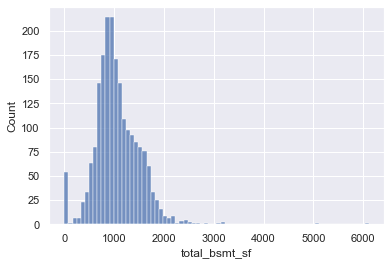

In [62]:
sns.histplot(x="total_bsmt_sf", data=df, palette="coolwarm")

In [63]:
df['total_bsmt_sf'].mean()

1057.7496339677891

In [64]:
df.loc[df['pid'] == 903230120, 'total_bsmt_sf'] = df['total_bsmt_sf'].mean()

 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garag_cars', 'garage_area'

<AxesSubplot:xlabel='garag_cars', ylabel='garage_area'>

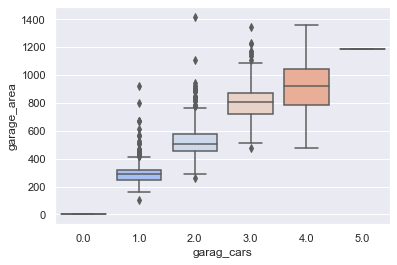

In [65]:
sns.boxplot(x="garag_cars", y="garage_area", data=df, palette="coolwarm")

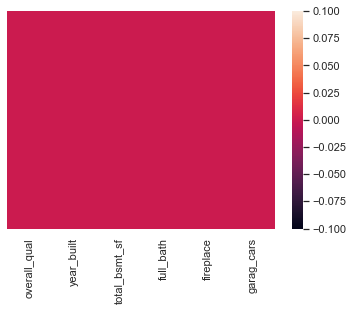

In [75]:
sns.heatmap(df.loc[:,['overall_qual', 'year_built', 'total_bsmt_sf', 'full_bath', 'fireplace', 'garag_cars']].isnull(), yticklabels = False)

sns.set(rc = {'figure.figsize':(30,20)})

In [76]:
df[df['alley'].isnull()]

Empty DataFrame
Columns: [id, pid, ms_subclass, ms_zoning, lot_front, lot_area, street, alley, lot_shape, land_contour, util, lot_config, land_slope, neighborhood, cond_1, cond_2, bldg_type, house_style, overall_qual, overall_cond, year_built, year_remod_add, roof_style, roof_matl, ext_1st, ext_2nd, mas_vnr_type, mas_vnr_area, exter_qual, exter_cond, foundation, bsmt_qual, bsmt_cond, bsmt_exposure, bsmtfin_type1, bsmtfin_sf1, bsmt_type2, bsmt_sf2, bsmt_unf_sf, total_bsmt_sf, heating, heating_qc, central_air, electrical, 1st_flr_sf, 2nd_flr_sf, low_qual_fin_sf, gr_liv_area, bsmt_full_bath, bsmt_half_bath, full_bath, half_bath, bedroom_abv_gr, kitchen_abv_gr, kitchen_qual, tot_rms_abv_grd, functional, fireplace, fireplace_qu, garage_type, garage_yr_blt, garage_finish, garag_cars, garage_area, garage_qual, garage_cond, paved_drive, wood_deck_sf, open_porch_sf, enclosed_porch, 3ssn_porch, screen_porch, pool_area, pool_qc, fence, misc_feature, misc_val, mo_sold, yr_sold, sale_type, sale_price]
Index: []

[0 rows x 81 columns]

<AxesSubplot:xlabel='fireplace', ylabel='sale_price'>

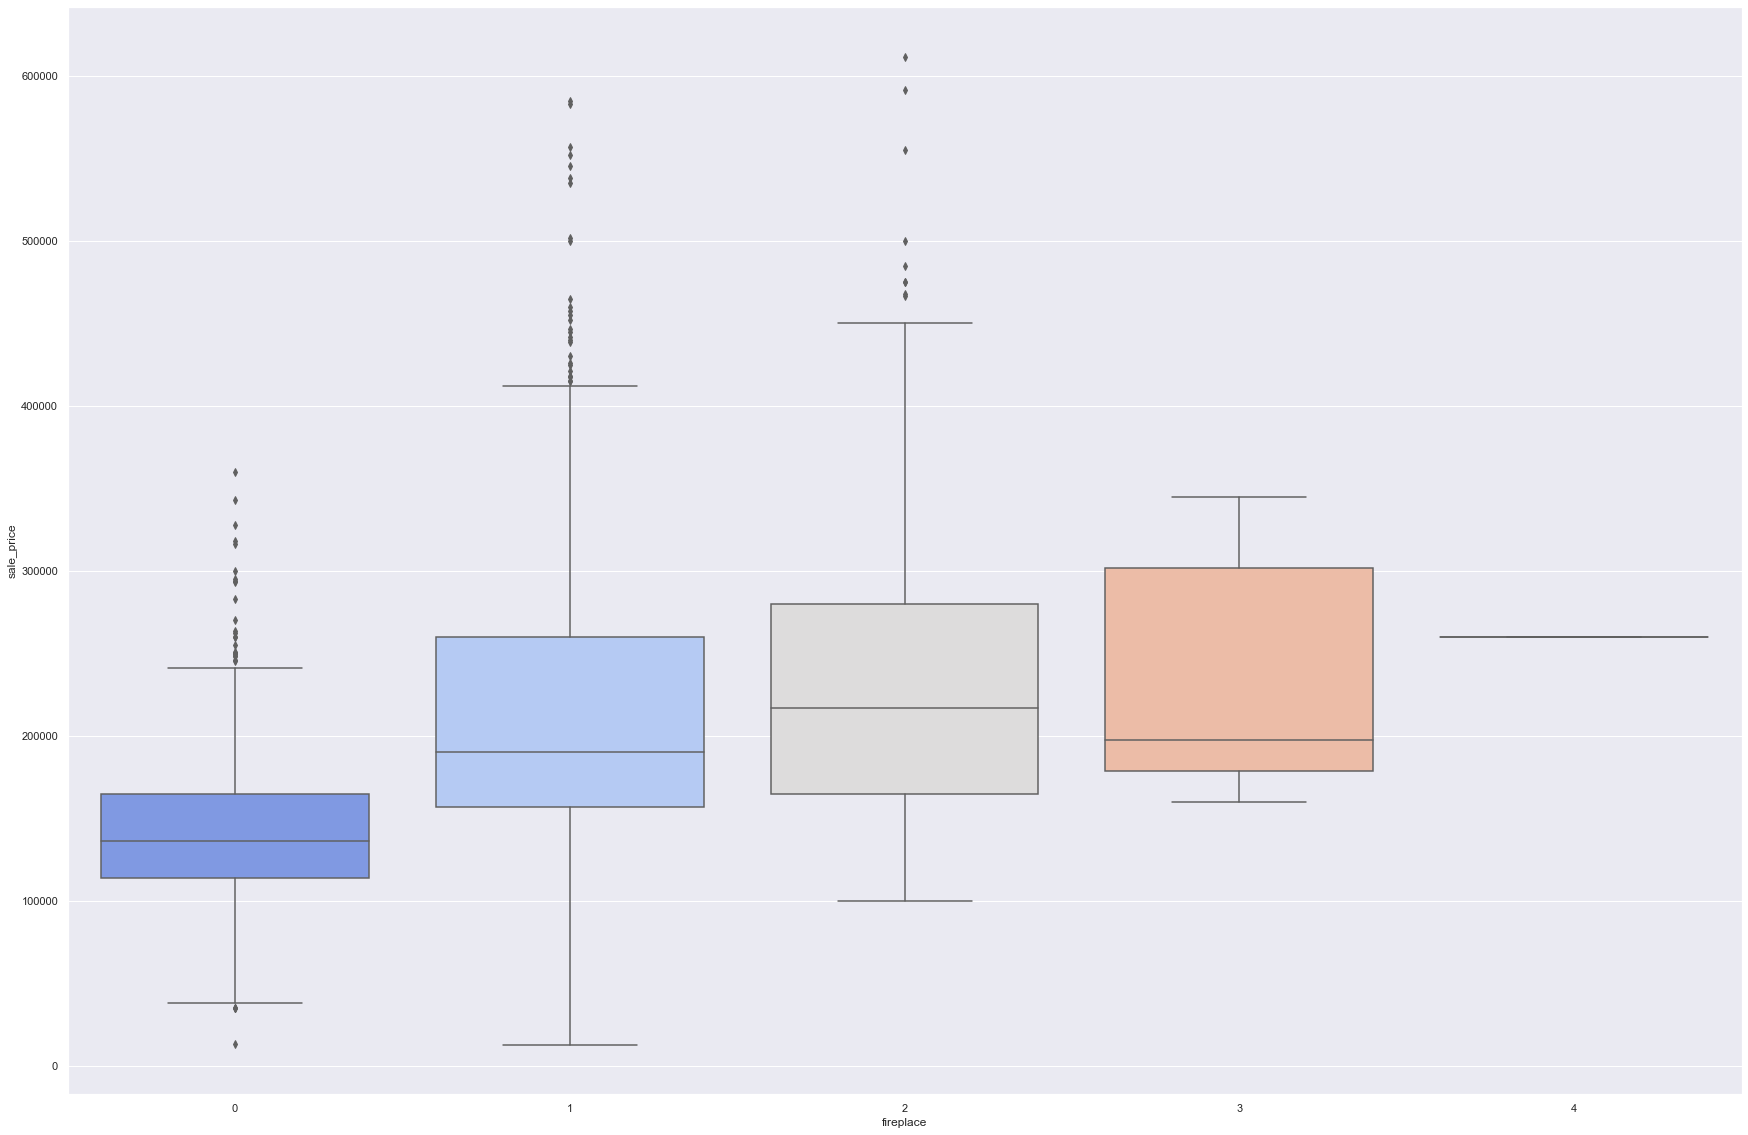

In [79]:
sns.boxplot(x="fireplace", y="sale_price", data=df, palette="coolwarm")

In [80]:
df.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_front', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'util', 'lot_config',
       'land_slope', 'neighborhood', 'cond_1', 'cond_2', 'bldg_type',
       'house_style', 'overall_qual', 'overall_cond', 'year_built',
       'year_remod_add', 'roof_style', 'roof_matl', 'ext_1st', 'ext_2nd',
       'mas_vnr_type', 'mas_vnr_area', 'exter_qual', 'exter_cond',
       'foundation', 'bsmt_qual', 'bsmt_cond', 'bsmt_exposure',
       'bsmtfin_type1', 'bsmtfin_sf1', 'bsmt_type2', 'bsmt_sf2', 'bsmt_unf_sf',
       'total_bsmt_sf', 'heating', 'heating_qc', 'central_air', 'electrical',
       '1st_flr_sf', '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area',
       'bsmt_full_bath', 'bsmt_half_bath', 'full_bath', 'half_bath',
       'bedroom_abv_gr', 'kitchen_abv_gr', 'kitchen_qual', 'tot_rms_abv_grd',
       'functional', 'fireplace', 'fireplace_qu', 'garage_type',
       'garage_yr_blt', 'garage_finish', 'garag_cars', 'garage_area'

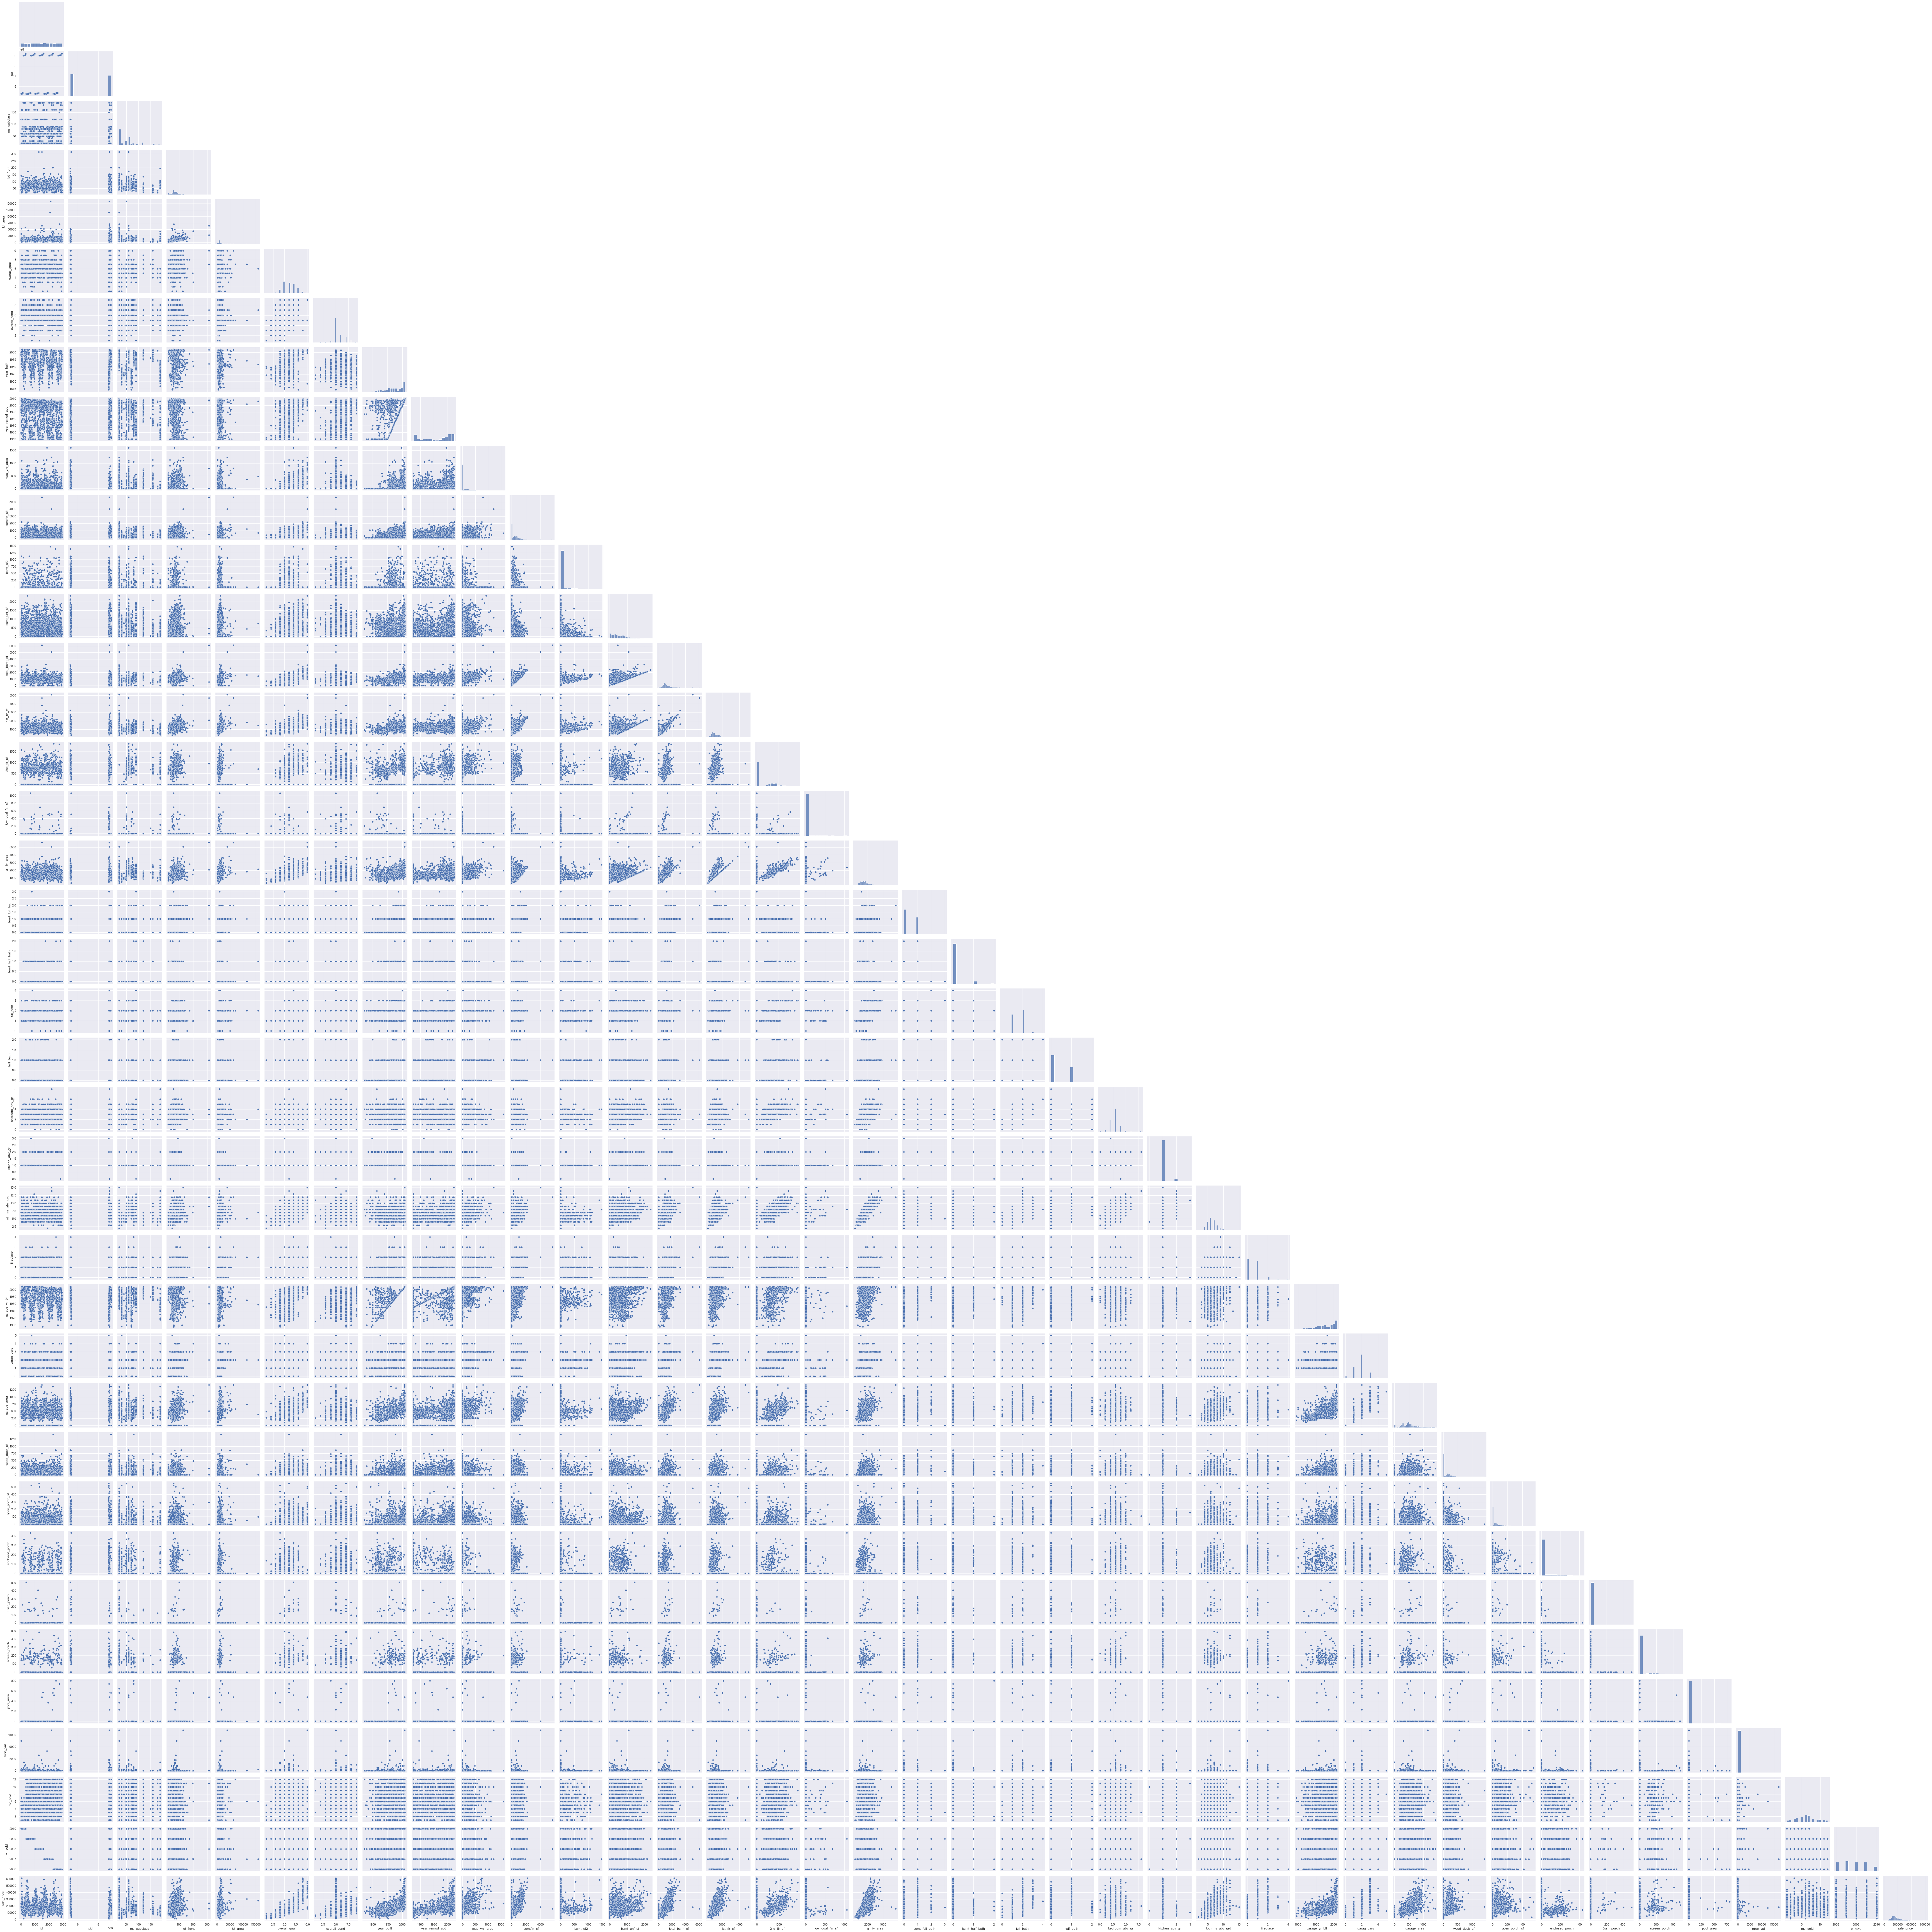

In [167]:
sns.pairplot(df, corner=True)

### Training and testing data 

In [ ]:
# ['overall_qual', 'year_built', 'total_bsmt_sf', 'full_bath', 'fireplace', 'garag_cars']

In [52]:
X = df[['fireplace']]
y = df['sale_price']

In [53]:
X.shape

(1991, 1)

In [54]:
y.shape

(1991,)

In [55]:
# Step 2: Instantiate the model
lr = LinearRegression()

In [57]:
# Step 3: Fit the model
lr.fit(X, y)

LinearRegression()

In [58]:
# R2 from model
lr.score(X, y)

0.2138491108850915

In [589]:
# Take a peek at the model coefficient and intercept
print(lr.intercept_)
print(lr.coef_)

149145.08166691673
[57156.3666426]


**null model**

In [590]:
# getting mean of sales price
df['sale_price'].mean()

183501.9944806824

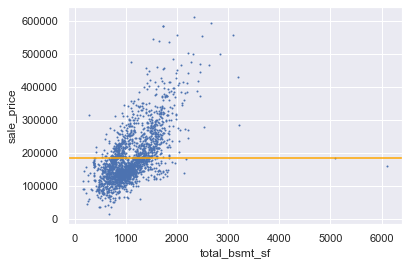

In [591]:
plt.scatter(df["total_bsmt_sf"], df["sale_price"], s=1)
plt.axhline(df['sale_price'].mean(), color = 'orange')
plt.xlabel('total_bsmt_sf')
plt.ylabel('sale_price');

# make predictions 

In [592]:
# Make predictions
y_pred = lr.predict(X)

In [593]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

lm = LinearRegression()

lm.fit(X,y)

# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [57156.3666426]


In [594]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

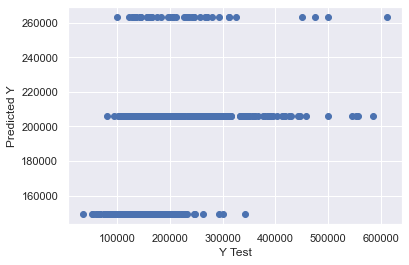

In [595]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [596]:
# R2 from model
lr.score(X, y)

0.21406033408625358

In [546]:
# results summary 
import statsmodels.api as sm

X = sm.add_constant(X, prepend=True)
results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             sale_price   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     137.9
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          4.00e-104
Time:                        22:58:03   Log-Likelihood:                -25060.
No. Observations:                1993   AIC:                         5.013e+04
Df Residuals:                    1988   BIC:                         5.016e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.499e+05   2232.117     67.170      0.000    1.46e+05    1.54e+05
fireplace_qu_Fa  2.036e+04   9384.976      2.169      0.030    1951.521    3.88e+04
fireplace_qu_Gd  8.442e+04   3803.313     22.196      0.000     7.7e+04    9.19e+04
fireplace_qu_Po -9607.4955    1.3e+04     -0.740      0.459   -3.51e+04    1.58e+04
fireplace_qu_TA  5.546e+04   4140.976     13.394      0.000    4.73e+04    6.36e+04
==============================================================================
Omnibus:                      621.142   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2338.175
Skew:                           1.495   Prob(JB):                         0.00
Kurtosis:                       7.384   Cond. No.                         8.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [509]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


new_mse = metrics.mean_squared_error(y_test, predictions)

MAE: 52776.966206790334
MSE: 5599823778.194625
RMSE: 74831.97029475187


In [510]:
# record best MSE 
MAE= 26549.746194677784
MSE= 1334410817.4872742
RMSE= 36529.58824688932

# calculate difference 
MSE - new_mse

-4265412960.7073507

In [511]:
# coefficients

coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

ValueError: Shape of passed values is (1, 1), indices imply (2, 1)

In [512]:
# R2 from model
lr.score(X, y)

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- const
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: X has 2 features, but LinearRegression is expecting 1 features as input.

In [82]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# lm = LinearRegression()

# lm.fit(X,y)

# # The coefficients
# print('Coefficients: \n', lm.coef_)